# DAA Experiment Harness (Template)
**Tujuan**: kerangka eksperimen untuk membandingkan *Algoritma A* vs *Algoritma B* pada instance unik per kelompok.
1. Isi `algo_A` dan `algo_B`.
2. Sesuaikan `generate_instances` atau loader data.
3. Atur `Ns`, `repeats`, `seed`.


In [1]:
import os, time, random, statistics
from pathlib import Path
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

Path('results').mkdir(exist_ok=True)

random.seed(42)
np.random.seed(42)

## Data Aquisition

In [2]:
##LOAD DATA

import pandas as pd

df = pd.read_csv(
    r"E:\DAA_Kelompok4_KelasA\data\normalized_fix.csv"
)

df.head(10)

,Hari,Jam,Mata Kuliah,Semester,SKS,Dosen,Ruang,Kelas,Kapasitas Kelas,start,finish,duration
0,Senin,09:20:00 - 10:10:00,Kalkulus I,1,3,SUPRIYADI WIBOWO,R001,A,25,09:20:00,10:10:00,50.0
1,Senin,10:15:00 - 11:05:00,Kalkulus I,1,3,SUPRIYADI WIBOWO,R001,A,25,10:15:00,11:05:00,50.0
2,Senin,11:10:00 - 12:00:00,Kalkulus I,1,3,SUPRIYADI WIBOWO,R001,A,25,11:10:00,12:00:00,50.0
3,Senin,13:00:00 - 13:50:00,Pengolahan Citra Digital,5,3,HERI PRASETYO,R001,B,25,13:00:00,13:50:00,50.0
4,Senin,13:55:00 - 14:45:00,Pengolahan Citra Digital,5,3,HERI PRASETYO,R001,B,25,13:55:00,14:45:00,50.0
5,Senin,15:30:00 - 16:20:00,Pengolahan Citra Digital,5,3,HERI PRASETYO,R001,B,25,15:30:00,16:20:00,50.0
6,Senin,16:25:00 - 17:15:00,Data Mining,5,3,WIRANTO,R001,E,25,16:25:00,17:15:00,50.0
7,Senin,18:10:00 - 19:00:00,Data Mining,5,3,WIRANTO,R001,E,25,18:10:00,19:00:00,50.0
8,Senin,22:15:00 - 23:05:00,Data Mining,5,3,WIRANTO,R001,E,25,22:15:00,23:05:00,50.0
9,Senin,13:00:00 - 13:50:00,Bahasa Indonesia,1,2,KUNDHARU SADDHONO,R002,C,40,13:00:00,13:50:00,50.0


In [3]:
##MENAMBAHKAN VARIABEL ACAK PADA KOLOM JUMLAH MAHASISWA
import pandas as pd
import numpy as np

# Set seed untuk reproducibility
np.random.seed(42)                                              # O(1)

# Load dataset
df = pd.read_csv(r"E:\DAA_Kelompok4_KelasA\data\normalized_fix.csv")  # O(n)

# Tambahkan kolom jumlah mahasiswa berdasarkan kapasitas kelas
df['jumlah_mahasiswa'] = df['Kapasitas Kelas'].apply(           # O(n)
    lambda cap: np.random.randint(int(cap*0.4), cap+1)         # O(1)
)


In [4]:
# Simpan kembali dataset baru
df.to_csv(r"E:\DAA_Kelompok4_KelasA\data\normalized_with_students.csv", index=False)   # O(n)

## Implementasi Algoritma A (Greedy EFT)

In [5]:
import pandas as pd
import time

# ============================================================
# LOAD DATASET
# ============================================================

def load_intervals(path):
    df = pd.read_csv(path)                                   # O(n)

    # Konversi start & finish ke datetime.time
    df['start'] = pd.to_datetime(df['start']).dt.time        # O(n)
    df['finish'] = pd.to_datetime(df['finish']).dt.time      # O(n)

    return df                                                # O(1)

In [6]:
# ============================================================
# ALGORITMA A — GREEDY EARLIEST FINISH TIME (EFT)
# ============================================================

def greedy_earliest_finish(intervals):
    # Ubah agar time comparison valid
    intervals['start_dt'] = pd.to_datetime(intervals['start'].astype(str))   # O(n)
    intervals['finish_dt'] = pd.to_datetime(intervals['finish'].astype(str)) # O(n)

    # Sort berdasarkan waktu selesai (finish) → langkah inti greedy
    sorted_idx = intervals.sort_values('finish_dt').index.tolist()           # O(n log n)

    selected = []                                                            # O(1)
    last_finish = pd.to_datetime("00:00")                                    # O(1)

    # Loop memilih interval
    for idx in sorted_idx:                                                   # O(n)
        start_val = intervals.loc[idx, 'start_dt']                           # O(1)
        finish_val = intervals.loc[idx, 'finish_dt']                         # O(1)

        if start_val >= last_finish:                                         # O(1)
            selected.append(idx)                                             # O(1)
            last_finish = finish_val                                         # O(1)

    return selected                                                          # O(k)

In [7]:
# ============================================================
# RUNNER UNTUK MENJALANKAN ALGORITMA A
# ============================================================

def run_baseline_A():
    path = r"E:\DAA_Kelompok4_KelasA\data\normalized_fix.csv"   # O(1)
    intervals = load_intervals(path)                            # O(n)

    t0 = time.time()                                            # O(1)
    selected = greedy_earliest_finish(intervals)                # O(n log n)
    t1 = time.time()                                            # O(1)

    exec_time = (t1 - t0) * 1000                                # O(1)

    print("Jumlah interval terpilih:", len(selected))
    print("Waktu eksekusi (ms):", exec_time)

    return selected, exec_time                                  # O(1)

In [8]:
##KASUS KECIL

import pandas as pd

test_df = pd.DataFrame({
    'start':  ["09:00", "09:30", "10:00"],
    'finish': ["09:50", "10:20", "11:00"],
    'duration': [50, 50, 60],
    'profit': [10, 5, 8]
})

In [9]:
selected, exec_time = greedy_earliest_finish(test_df), 0
print(selected)

[0, 2]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\1179081887.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervals['start_dt'] = pd.to_datetime(intervals['start'].astype(str))   # O(n)
C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\1179081887.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervals['finish_dt'] = pd.to_datetime(intervals['finish'].astype(str)) # O(n)


In [10]:
##MENGGUNAKAN NON OVERLAP
test_df = pd.DataFrame({
    'start':  ["08:00", "09:00", "10:00", "11:00"],
    'finish': ["09:00", "10:00", "11:00", "12:00"],
    'duration': [60, 60, 60, 60],
    'profit': [10, 20, 30, 40]
})

selected = greedy_earliest_finish(test_df)
print(selected)

[0, 1, 2, 3]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\1179081887.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervals['start_dt'] = pd.to_datetime(intervals['start'].astype(str))   # O(n)
C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\1179081887.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervals['finish_dt'] = pd.to_datetime(intervals['finish'].astype(str)) # O(n)


## Implementasi Algoritma (Greedy Profit Density)

In [11]:
import pandas as pd

def greedy_profit_density(intervals):
    
    # --------------------------------------------------------
    # 1. Copy dataset (agar tidak mengubah data asli)
    # --------------------------------------------------------
    data = intervals.copy()                     # O(n)

    # --------------------------------------------------------
    # 2. Hitung profit density = profit / duration
    # --------------------------------------------------------
    data['density'] = data['profit'] / data['duration']   # O(n)

    # --------------------------------------------------------
    # 3. Urutkan interval berdasarkan density (descending)
    # --------------------------------------------------------
    sorted_idx = (
        data
        .sort_values('density', ascending=False)           # O(n log n)
        .index
        .tolist()
    )

    # --------------------------------------------------------
    # 4. Proses seleksi interval (cek overlap)
    # --------------------------------------------------------
    selected = []                                          # O(1)
    last_finish = pd.to_datetime("1900-01-01 00:00")       # O(1)

    for idx in sorted_idx:                                 # O(n)
        start = data.loc[idx, 'start_dt']                  # O(1)
        finish = data.loc[idx, 'finish_dt']                # O(1)

        if start >= last_finish:                           # O(1)
            selected.append(idx)                           # O(1)
            last_finish = finish                           # O(1)

    # --------------------------------------------------------
    # 5. Kembalikan hasil
    # --------------------------------------------------------
    return selected                                        # O(k)


In [18]:
df = load_instance("../data/normalized_fix.csv").head(20)

res_B = greedy_profit_density(df)
print("Interval terpilih (B):", res_B)
print("Jumlah interval:", len(res_B))


Interval terpilih (B): [12, 9, 11, 8]
Jumlah interval: 4


In [19]:
## PILOT RUN
import time

df_full = load_instance("../data/normalized_fix.csv")

Ns = [10, 20, 40]   # kecil – sedang

for n in Ns:
    df_n = df_full.head(n)

    # Algoritma A (EFT)
    t0 = time.time()
    res_A = greedy_earliest_finish(df_n)
    t1 = time.time()

    # Algoritma B (Profit Density)
    t2 = time.time()
    res_B = greedy_profit_density(df_n)
    t3 = time.time()

    print(f"\nN = {n}")
    print(f"EFT     → intervals: {len(res_A)}, time: {(t1-t0)*1000:.3f} ms")
    print(f"Density → intervals: {len(res_B)}, time: {(t3-t2)*1000:.3f} ms")



N = 10
EFT     → intervals: 9, time: 9.385 ms
Density → intervals: 6, time: 7.555 ms

N = 20
EFT     → intervals: 11, time: 14.009 ms
Density → intervals: 4, time: 6.377 ms

N = 40
EFT     → intervals: 11, time: 12.263 ms
Density → intervals: 6, time: 5.434 ms


C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\1179081887.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervals['start_dt'] = pd.to_datetime(intervals['start'].astype(str))   # O(n)
C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\1179081887.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intervals['start_dt'] = pd.to_datetime(intervals['start'].astype(str))   # O(n)
C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\1179081887.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please 

## Pembangkit/Loader Instance (SESUAIKAN)

In [13]:
import sys                     # O(1)
import os                      # O(1)

# Menambahkan path folder ../src ke Python path
sys.path.append(               # O(1) 
    os.path.abspath("../src")  # O(1) 
)

import loader                  # O(1)
print(dir(loader))             # O(m)


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'load_instance', 'pd']


In [16]:
from loader import load_instance #O(1)
df = load_instance("../data/normalized_fix.csv") #O(n)
df.head(10) #O(1)


,Hari,Jam,Mata Kuliah,Semester,SKS,Dosen,Ruang,Kelas,Kapasitas Kelas,start,finish,duration,start_dt,finish_dt,profit
0,Senin,09:20:00 - 10:10:00,Kalkulus I,1,3,SUPRIYADI WIBOWO,R001,A,25,09:20:00,10:10:00,50.0,2025-12-13 09:20:00,2025-12-13 10:10:00,25
1,Senin,10:15:00 - 11:05:00,Kalkulus I,1,3,SUPRIYADI WIBOWO,R001,A,25,10:15:00,11:05:00,50.0,2025-12-13 10:15:00,2025-12-13 11:05:00,25
2,Senin,11:10:00 - 12:00:00,Kalkulus I,1,3,SUPRIYADI WIBOWO,R001,A,25,11:10:00,12:00:00,50.0,2025-12-13 11:10:00,2025-12-13 12:00:00,25
3,Senin,13:00:00 - 13:50:00,Pengolahan Citra Digital,5,3,HERI PRASETYO,R001,B,25,13:00:00,13:50:00,50.0,2025-12-13 13:00:00,2025-12-13 13:50:00,25
4,Senin,13:55:00 - 14:45:00,Pengolahan Citra Digital,5,3,HERI PRASETYO,R001,B,25,13:55:00,14:45:00,50.0,2025-12-13 13:55:00,2025-12-13 14:45:00,25
5,Senin,15:30:00 - 16:20:00,Pengolahan Citra Digital,5,3,HERI PRASETYO,R001,B,25,15:30:00,16:20:00,50.0,2025-12-13 15:30:00,2025-12-13 16:20:00,25
6,Senin,16:25:00 - 17:15:00,Data Mining,5,3,WIRANTO,R001,E,25,16:25:00,17:15:00,50.0,2025-12-13 16:25:00,2025-12-13 17:15:00,25
7,Senin,18:10:00 - 19:00:00,Data Mining,5,3,WIRANTO,R001,E,25,18:10:00,19:00:00,50.0,2025-12-13 18:10:00,2025-12-13 19:00:00,25
8,Senin,22:15:00 - 23:05:00,Data Mining,5,3,WIRANTO,R001,E,25,22:15:00,23:05:00,50.0,2025-12-13 22:15:00,2025-12-13 23:05:00,25
9,Senin,13:00:00 - 13:50:00,Bahasa Indonesia,1,2,KUNDHARU SADDHONO,R002,C,40,13:00:00,13:50:00,50.0,2025-12-13 13:00:00,2025-12-13 13:50:00,40


In [20]:
import pandas as pd

def test_eft_overlap():
    # Dataset kecil (manual)
    df_test = pd.DataFrame({
        'start':  ['09:00', '09:30', '10:00'],
        'finish': ['09:50', '10:20', '11:00'],
        'duration': [50, 50, 60],
        'profit': [10, 5, 8]
    })

    # Konversi waktu (samakan dengan loader)
    df_test['start_dt']  = pd.to_datetime(df_test['start'], format="%H:%M")
    df_test['finish_dt'] = pd.to_datetime(df_test['finish'], format="%H:%M")

    # Jalankan algoritma EFT
    result = greedy_earliest_finish(df_test)

    # Hasil yang BENAR secara teori
    expected = [0, 2]

    assert result == expected, f"Expected {expected}, got {result}"
    print("✅ Test EFT (overlap) LULUS")


In [21]:
test_eft_overlap()


✅ Test EFT (overlap) LULUS


C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\1179081887.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervals['start_dt'] = pd.to_datetime(intervals['start'].astype(str))   # O(n)
C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\1179081887.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intervals['finish_dt'] = pd.to_datetime(intervals['finish'].astype(str)) # O(n)


## Evaluator & Timing

In [22]:
def run_once(algorithm, instance):
    """
    Jalankan satu algoritma pada satu instance
    Return:
    - waktu eksekusi (ms)
    - gap (0 = feasible, 1 = infeasible)
    """
    t0 = time.perf_counter()                       # O(1)
    out = algorithm(instance)                      # O(T(n))
    dt = (time.perf_counter() - t0) * 1000.0       # O(1)

    gap = evaluate_solution(out, instance)         # O(k)

    return dt, gap


In [23]:
def greedy_earliest_finish(intervals):
    sorted_idx = (
        intervals
        .sort_values('finish_dt')
        .index
        .tolist()
    )

    selected = []
    last_finish = pd.to_datetime("1900-01-01 00:00")

    for idx in sorted_idx:
        start = intervals.loc[idx, 'start_dt']
        finish = intervals.loc[idx, 'finish_dt']

        if start >= last_finish:
            selected.append(idx)
            last_finish = finish

    return selected


In [24]:
def evaluate_solution(selected_idx, df):
    if not isinstance(selected_idx, list):
        return 1.0

    intervals = df.loc[selected_idx].sort_values('start_dt')

    last_finish = None
    for _, row in intervals.iterrows():
        if last_finish is not None and row['start_dt'] < last_finish:
            return 1.0
        last_finish = row['finish_dt']

    return 0.0


In [25]:
dt_A, gap_A = run_once(greedy_earliest_finish, df)
dt_B, gap_B = run_once(greedy_profit_density, df)

print("EFT  → time:", dt_A, "gap:", gap_A)
print("B    → time:", dt_B, "gap:", gap_B)


EFT  → time: 6.460100001277169 gap: 0.0
B    → time: 9.043799997016322 gap: 0.0


## Eksekusi Eksperimen (atur parameter)

In [26]:
# Load dataset utama
df_full = load_instance("../data/normalized_fix.csv")

In [27]:
# ============================================================
# PARAMETER EKSPERIMEN (HARI 6)
# ============================================================

Ns = [10, 20, 40]          # ukuran masalah
seeds = [1, 2, 3, 4, 5]    # seed untuk reproducibility
repeats = 3               # jumlah pengulangan

algorithms = {
    "EFT": greedy_earliest_finish,
    "Density": greedy_profit_density
}

In [28]:
# ============================================================
# EKSEKUSI EKSPERIMEN (BATCH RUN)
# ============================================================

for n in Ns:
    print("=" * 50)
    print(f"UKURAN MASALAH (n) = {n}")
    print("=" * 50)

    for alg_name, alg_func in algorithms.items():
        times = []
        gaps = []
        counts = []

        for seed in seeds:
            # set seed (reproducibility)
            np.random.seed(seed)

            # sampling / shuffle data
            df_n = df_full.sample(n=n, random_state=seed)

            for r in range(repeats):
                dt, gap = run_once(alg_func, df_n)

                times.append(dt)
                gaps.append(gap)
                counts.append(len(alg_func(df_n)))

        # Hitung statistik
        mean_time = np.mean(times)
        std_time = np.std(times)

        mean_gap = np.mean(gaps)
        mean_count = np.mean(counts)

        # Print ringkasan
        print(f"\nAlgoritma: {alg_name}")
        print(f"Rata-rata waktu (ms): {mean_time:.3f} ± {std_time:.3f}")
        print(f"Rata-rata gap       : {mean_gap:.2f}")
        print(f"Rata-rata interval  : {mean_count:.2f}")

    print("\n")


UKURAN MASALAH (n) = 10

Algoritma: EFT
Rata-rata waktu (ms): 4.010 ± 1.001
Rata-rata gap       : 0.00
Rata-rata interval  : 5.80

Algoritma: Density
Rata-rata waktu (ms): 4.926 ± 0.596
Rata-rata gap       : 0.00
Rata-rata interval  : 3.40


UKURAN MASALAH (n) = 20

Algoritma: EFT
Rata-rata waktu (ms): 4.507 ± 2.273
Rata-rata gap       : 0.00
Rata-rata interval  : 8.00

Algoritma: Density
Rata-rata waktu (ms): 8.525 ± 5.594
Rata-rata gap       : 0.00
Rata-rata interval  : 2.80


UKURAN MASALAH (n) = 40

Algoritma: EFT
Rata-rata waktu (ms): 5.277 ± 0.923
Rata-rata gap       : 0.00
Rata-rata interval  : 10.20

Algoritma: Density
Rata-rata waktu (ms): 6.506 ± 0.680
Rata-rata gap       : 0.00
Rata-rata interval  : 3.60




In [30]:
# ============================================================
# SIMPAN HASIL MENTAH (RAW RESULT)
# ============================================================

results = []   # akan jadi experiment_raw

import numpy as np

for n in Ns:
    for alg_name, alg_func in algorithms.items():
        for seed in seeds:
            np.random.seed(seed)
            df_n = df_full.sample(n=n, random_state=seed)

            for r in range(repeats):
                dt, gap = run_once(alg_func, df_n)
                count = len(alg_func(df_n))

                results.append({
                    "n": n,
                    "algorithm": alg_name,
                    "seed": seed,
                    "repeat": r,
                    "time_ms": dt,
                    "gap": gap,
                    "num_intervals": count
                })


In [31]:
raw_df = pd.DataFrame(results)
raw_df.head()


,n,algorithm,seed,repeat,time_ms,gap,num_intervals
0,10,EFT,1,0,6.5347,0.0,8
1,10,EFT,1,1,4.3017,0.0,8
2,10,EFT,1,2,3.1736,0.0,8
3,10,EFT,2,0,4.7713,0.0,5
4,10,EFT,2,1,4.1374,0.0,5


In [32]:
summary_df = (
    raw_df
    .groupby(["n", "algorithm"])
    .agg(
        mean_time_ms = ("time_ms", "mean"),
        std_time_ms  = ("time_ms", "std"),
        mean_gap     = ("gap", "mean"),
        mean_intervals = ("num_intervals", "mean")
    )
    .reset_index()
)

summary_df


,n,algorithm,mean_time_ms,std_time_ms,mean_gap,mean_intervals
0,10,Density,4.515480,0.393196,0.0,3.4
1,10,EFT,4.158793,1.045661,0.0,5.8
2,20,Density,5.425813,0.872532,0.0,2.8
3,20,EFT,4.225607,0.513480,0.0,8.0
4,40,Density,6.831833,2.243998,0.0,3.6
5,40,EFT,5.859267,1.053881,0.0,10.2


In [33]:
import pandas as pd
import numpy as np
import time

# --- helper: hitung total profit dari solusi ---
def total_profit(selected_idx, df):
    # O(k)
    if not isinstance(selected_idx, list) or len(selected_idx) == 0:
        return 0.0
    return float(df.loc[selected_idx, "profit"].sum())

# --- helper: ambil detail interval terpilih (buat print “detail solusi”) ---
def solution_detail(selected_idx, df, max_rows=8):
    # O(k log k)
    if not isinstance(selected_idx, list) or len(selected_idx) == 0:
        return []
    chosen = (df.loc[selected_idx]
              .sort_values("start_dt")
              .loc[:, ["Hari","start","finish","Mata Kuliah","Dosen","Ruang","Kelas","profit","duration"]])
    return chosen.head(max_rows).to_dict("records")

results = []

for n in Ns:
    for seed in seeds:
        df_n = df_full.sample(n=n, random_state=seed)  # controllable randomness

        for alg_name, alg_func in algorithms.items():
            for r in range(repeats):
                t0 = time.perf_counter()
                sol = alg_func(df_n)
                dt_ms = (time.perf_counter() - t0) * 1000.0

                gap = evaluate_solution(sol, df_n)          # 0 = feasible, 1 = overlap
                num_int = len(sol) if isinstance(sol, list) else 0
                profit_sum = total_profit(sol, df_n)

                results.append({
                    "experiment_id": f"INTSCHED_UNS_{n}",
                    "n": int(n),
                    "seed": int(seed),
                    "repeat": int(r),
                    "algorithm": alg_name,
                    "time_ms": float(dt_ms),
                    "gap": float(gap),
                    "num_intervals": int(num_int),
                    "total_profit": float(profit_sum),
                    # simpan solusi (opsional, bisa berat jika besar)
                    "selected_idx": sol
                })

results_df = pd.DataFrame(results)
results_df.head()


,experiment_id,n,seed,repeat,algorithm,time_ms,gap,num_intervals,total_profit,selected_idx
0,INTSCHED_UNS_10,10,1,0,EFT,5.6940,0.0,8,260.0,"[360, 29, 146, 374, 62, 172, 92, 296]"
1,INTSCHED_UNS_10,10,1,1,EFT,3.9100,0.0,8,260.0,"[360, 29, 146, 374, 62, 172, 92, 296]"
2,INTSCHED_UNS_10,10,1,2,EFT,3.5727,0.0,8,260.0,"[360, 29, 146, 374, 62, 172, 92, 296]"
3,INTSCHED_UNS_10,10,1,0,Density,5.4574,0.0,3,120.0,"[62, 172, 296]"
4,INTSCHED_UNS_10,10,1,1,Density,4.7540,0.0,3,120.0,"[62, 172, 296]"


In [34]:
summary_df = (
    results_df
    .groupby(["n", "algorithm"], as_index=False)
    .agg(
        mean_time_ms=("time_ms", "mean"),
        std_time_ms=("time_ms", "std"),
        mean_gap=("gap", "mean"),
        mean_intervals=("num_intervals", "mean"),
        mean_total_profit=("total_profit", "mean"),
    )
)

print("==================== RINGKASAN HASIL EKSPERIMEN ====================")
print(summary_df.sort_values(["n","algorithm"]).to_string(index=False))


==================== RINGKASAN HASIL EKSPERIMEN ====================
 n algorithm  mean_time_ms  std_time_ms  mean_gap  mean_intervals  mean_total_profit
10   Density      4.407793     0.558556       0.0             3.4              125.0
10       EFT      3.755300     0.936777       0.0             5.8              184.0
20   Density      5.261527     0.879897       0.0             2.8              111.0
20       EFT      3.950940     0.990024       0.0             8.0              250.0
40   Density      6.258633     1.021917       0.0             3.6              140.0
40       EFT      5.702693     1.627395       0.0            10.2              306.0


In [35]:
print("\nDetail solusi (beberapa contoh run):\n")

samples = results_df.sample(3, random_state=1)  # ambil 3 eksperimen acak
for _, row in samples.iterrows():
    print(f"[Experiment] n={row['n']}, algo={row['algorithm']}, seed={row['seed']}, rep={row['repeat']}")
    print(f"  - time_ms       : {row['time_ms']:.3f}")
    print(f"  - gap           : {row['gap']:.1f}")
    print(f"  - num_intervals : {row['num_intervals']}")
    print(f"  - total_profit  : {row['total_profit']:.1f}")

    det = solution_detail(row["selected_idx"], df_full.sample(n=row["n"], random_state=row["seed"]))
    print("  - Contoh interval terpilih (maks 8 baris):")
    for d in det:
        print(f"    * {d['Hari']} {d['start']}-{d['finish']} | {d['Mata Kuliah']} | {d['Dosen']} | profit={d['profit']} dur={d['duration']}")
    print()



Detail solusi (beberapa contoh run):

[Experiment] n=20, algo=Density, seed=5, rep=1
  - time_ms       : 4.308
  - gap           : 0.0
  - num_intervals : 4
  - total_profit  : 170.0
  - Contoh interval terpilih (maks 8 baris):
    * Kamis 10:15:00-11:05:00 | Pendidikan Agama Islam | ARIFUDDIN | profit=45 dur=50.0
    * Senin 11:10:00-12:00:00 | Teori Game | NUGHTHOH ARFAWI KURDHI | profit=45 dur=50.0
    * Rabu 13:55:00-14:45:00 | Teknologi IoT | ABDUL AZIZ | profit=45 dur=50.0
    * Senin 15:30:00-16:20:00 | Sistem Terdistribusi | WISNU WIDIARTO | profit=35 dur=50.0

[Experiment] n=40, algo=EFT, seed=4, rep=0
  - time_ms       : 8.160
  - gap           : 0.0
  - num_intervals : 11
  - total_profit  : 360.0
  - Contoh interval terpilih (maks 8 baris):
    * Senin 07:30:00-08:20:00 | Manajemen Jaringan | HERDITO IBNU DEWANGKORO | profit=40 dur=50.0
    * Rabu 08:25:00-09:15:00 | Matematika Diskrit II | SHAIFUDIN ZUHDI | profit=25 dur=50.0
    * Selasa 09:20:00-10:10:00 | Kewirausahaan

## Hardware Specification

In [36]:
import platform
import psutil
import cpuinfo
import shutil
import subprocess

def get_local_hw_spec():
    # OS & Python
    os_name = platform.system()
    os_version = platform.platform()
    python_version = platform.python_version()

    # CPU
    cpu_brand = cpuinfo.get_cpu_info().get("brand_raw", "Unknown")
    cpu_cores_physical = psutil.cpu_count(logical=False)
    cpu_cores_logical = psutil.cpu_count(logical=True)

    # RAM
    ram_total_gb = psutil.virtual_memory().total / (1024 ** 3)

    # GPU (optional, Windows & Linux)
    gpu_name = "Not detected"
    try:
        if os_name == "Windows":
            out = subprocess.check_output(
                "wmic path win32_VideoController get name",
                shell=True
            ).decode()
            lines = [l.strip() for l in out.splitlines() if l.strip() and "Name" not in l]
            if lines:
                gpu_name = ", ".join(lines)

        elif os_name == "Linux":
            out = subprocess.check_output(
                ["bash", "-lc", "lspci | grep -i vga"],
                stderr=subprocess.DEVNULL
            ).decode().strip()
            if out:
                gpu_name = out

    except:
        pass

    return {
        "OS": os_version,
        "Python": python_version,
        "CPU": cpu_brand,
        "CPU Cores (Physical)": cpu_cores_physical,
        "CPU Cores (Logical)": cpu_cores_logical,
        "RAM Total (GB)": round(ram_total_gb, 2),
        "GPU": gpu_name
    }

# Jalankan
spec = get_local_hw_spec()

print("=== HARDWARE SPEC (Local VS Code Runtime) ===")
for k, v in spec.items():
    print(f"{k:>22}: {v}")


=== HARDWARE SPEC (Local VS Code Runtime) ===
                    OS: Windows-11-10.0.26200-SP0
                Python: 3.13.1
                   CPU: AMD Ryzen 7 7435HS
  CPU Cores (Physical): 8
   CPU Cores (Logical): 16
        RAM Total (GB): 15.82
                   GPU: NVIDIA GeForce RTX 2050


## Measure Time and Memory Used

In [37]:
import time
import tracemalloc

def run_with_metrics(fn, *args, **kwargs):
    tracemalloc.start()                     # O(1)
    t0 = time.perf_counter()                # O(1)

    out = fn(*args, **kwargs)               # O(T(n)) tergantung algoritma

    runtime = time.perf_counter() - t0      # O(1)
    current, peak = tracemalloc.get_traced_memory()  # O(1)
    tracemalloc.stop()                      # O(1)

    peak_mb = peak / (1024 ** 2)             # O(1)
    return out, runtime * 1000, peak_mb      # runtime ms


In [38]:
# Ambil subset kecil dulu (pilot)
df_test = df_full.sample(n=40, random_state=1)

eft_out, eft_time_ms, eft_mem_mb = run_with_metrics(
    greedy_earliest_finish,
    df_test
)

print("=== GREEDY EFT ===")
print("Jumlah interval:", len(eft_out))
print("Runtime (ms):", round(eft_time_ms, 3))
print("Peak memory (MB):", round(eft_mem_mb, 4))


=== GREEDY EFT ===
Jumlah interval: 9
Runtime (ms): 74.522
Peak memory (MB): 0.0149


In [39]:
dens_out, dens_time_ms, dens_mem_mb = run_with_metrics(
    greedy_profit_density,
    df_test
)

print("\n=== GREEDY PROFIT DENSITY ===")
print("Jumlah interval:", len(dens_out))
print("Runtime (ms):", round(dens_time_ms, 3))
print("Peak memory (MB):", round(dens_mem_mb, 4))



=== GREEDY PROFIT DENSITY ===
Jumlah interval: 2
Runtime (ms): 73.455
Peak memory (MB): 0.0261


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# DATAFRAME HASIL EKSPERIMEN GREEDY
# ============================================================

df = results_df.copy()

# Pastikan tipe data benar
df["n"] = df["n"].astype(int)
df["time_ms"] = df["time_ms"].astype(float)
df["gap"] = df["gap"].astype(float)
df["num_intervals"] = df["num_intervals"].astype(int)
df["total_profit"] = df["total_profit"].astype(float)

df.head(6)


,experiment_id,n,seed,repeat,algorithm,time_ms,gap,num_intervals,total_profit,selected_idx
0,INTSCHED_UNS_10,10,1,0,EFT,5.6940,0.0,8,260.0,"[360, 29, 146, 374, 62, 172, 92, 296]"
1,INTSCHED_UNS_10,10,1,1,EFT,3.9100,0.0,8,260.0,"[360, 29, 146, 374, 62, 172, 92, 296]"
2,INTSCHED_UNS_10,10,1,2,EFT,3.5727,0.0,8,260.0,"[360, 29, 146, 374, 62, 172, 92, 296]"
3,INTSCHED_UNS_10,10,1,0,Density,5.4574,0.0,3,120.0,"[62, 172, 296]"
4,INTSCHED_UNS_10,10,1,1,Density,4.7540,0.0,3,120.0,"[62, 172, 296]"
5,INTSCHED_UNS_10,10,1,2,Density,4.1031,0.0,3,120.0,"[62, 172, 296]"


## Plot & Tabel

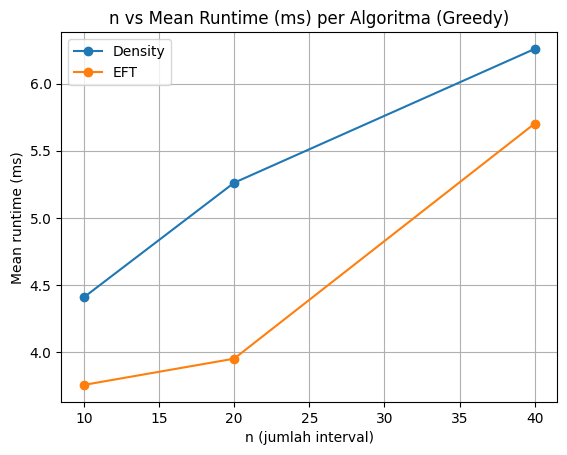

In [41]:
# ============================================================
# LINE CHART: n vs Mean Runtime (Greedy)
# ============================================================

mean_time = (
    results_df
    .groupby(["n", "algorithm"], as_index=False)
    .agg(mean_runtime_ms=("time_ms", "mean"))
)

plt.figure()

for algo in mean_time["algorithm"].unique():
    tmp = (
        mean_time[mean_time["algorithm"] == algo]
        .sort_values("n")
    )
    plt.plot(
        tmp["n"],
        tmp["mean_runtime_ms"],
        marker="o",
        label=algo
    )

plt.xlabel("n (jumlah interval)")
plt.ylabel("Mean runtime (ms)")
plt.title("n vs Mean Runtime (ms) per Algoritma (Greedy)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\2021695518.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


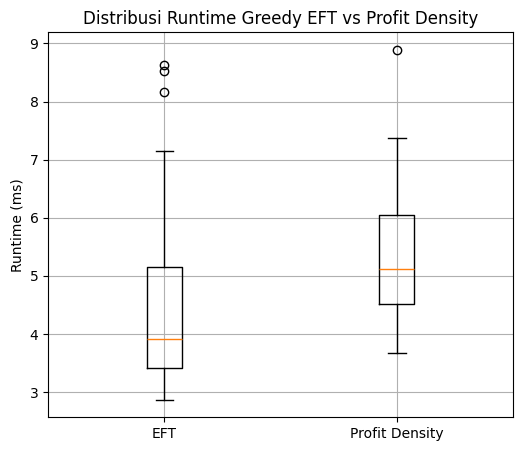

In [42]:
import matplotlib.pyplot as plt

# ============================================================
# BOXPLOT: Runtime per Algoritma (tanpa n)
# ============================================================

plt.figure(figsize=(6, 5))

# Ambil data runtime per algoritma
data = [
    results_df[results_df["algorithm"] == "EFT"]["time_ms"],
    results_df[results_df["algorithm"] == "Density"]["time_ms"]
]

plt.boxplot(
    data,
    labels=["EFT", "Profit Density"],
    showfliers=True
)

plt.ylabel("Runtime (ms)")
plt.title("Distribusi Runtime Greedy EFT vs Profit Density")
plt.grid(True)
plt.show()


In [43]:
# ============================================================
# HITUNG GAP (%) PER n & ALGORITMA
# ============================================================

gap_summary = (
    results_df
    .groupby(["n", "algorithm"], as_index=False)
    .agg(mean_gap=("gap", "mean"))
)

gap_summary["gap_percent"] = gap_summary["mean_gap"] * 100
gap_summary


,n,algorithm,mean_gap,gap_percent
0,10,Density,0.0,0.0
1,10,EFT,0.0,0.0
2,20,Density,0.0,0.0
3,20,EFT,0.0,0.0
4,40,Density,0.0,0.0
5,40,EFT,0.0,0.0


## LINE CHART — Gap (%) vs n (Greedy)

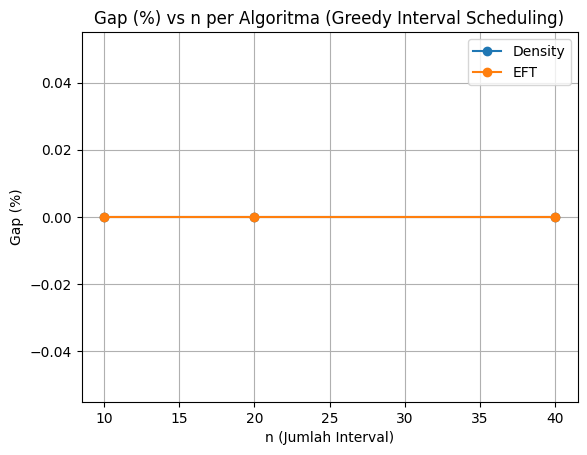

In [44]:
import matplotlib.pyplot as plt

# ============================================================
# LINE CHART: GAP (%) vs n
# ============================================================

plt.figure()

for algo in gap_summary["algorithm"].unique():
    tmp = (
        gap_summary[gap_summary["algorithm"] == algo]
        .sort_values("n")
    )
    plt.plot(
        tmp["n"],
        tmp["gap_percent"],
        marker="o",
        label=algo
    )

plt.xlabel("n (Jumlah Interval)")
plt.ylabel("Gap (%)")
plt.title("Gap (%) vs n per Algoritma (Greedy Interval Scheduling)")
plt.legend()
plt.grid(True)
plt.show()


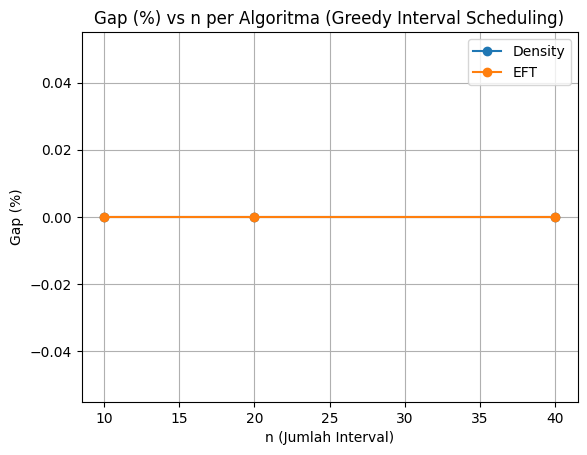

In [45]:
import matplotlib.pyplot as plt

# ============================================================
# LINE CHART: GAP (%) vs n
# ============================================================

plt.figure()

for algo in gap_summary["algorithm"].unique():
    tmp = (
        gap_summary[gap_summary["algorithm"] == algo]
        .sort_values("n")
    )
    plt.plot(
        tmp["n"],
        tmp["gap_percent"],
        marker="o",
        label=algo
    )

plt.xlabel("n (Jumlah Interval)")
plt.ylabel("Gap (%)")
plt.title("Gap (%) vs n per Algoritma (Greedy Interval Scheduling)")
plt.legend()
plt.grid(True)
plt.show()


## n vs Mean Intervals Processed per Algoritma (Greedy)

In [46]:
df_ops = results_df.copy()

# Dalam greedy, setiap interval diproses sekali
df_ops["intervals_processed"] = df_ops["n"]


In [47]:
ops_summary = (
    df_ops
    .groupby(["n", "algorithm"], as_index=False)
    .agg(mean_intervals_processed=("intervals_processed", "mean"))
)

ops_summary


,n,algorithm,mean_intervals_processed
0,10,Density,10.0
1,10,EFT,10.0
2,20,Density,20.0
3,20,EFT,20.0
4,40,Density,40.0
5,40,EFT,40.0


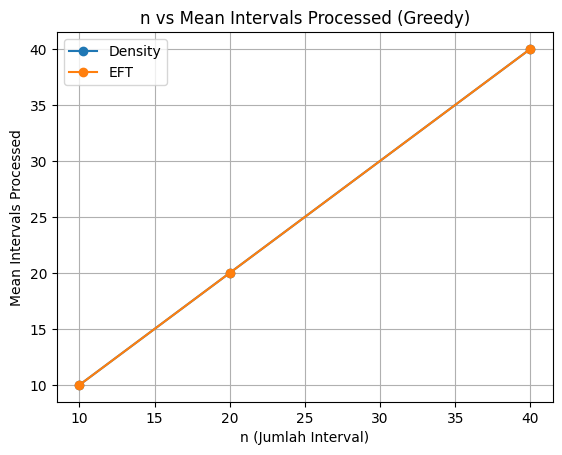

In [48]:
import matplotlib.pyplot as plt

plt.figure()

for algo in ops_summary["algorithm"].unique():
    tmp = (
        ops_summary[ops_summary["algorithm"] == algo]
        .sort_values("n")
    )
    plt.plot(
        tmp["n"],
        tmp["mean_intervals_processed"],
        marker="o",
        label=algo
    )

plt.xlabel("n (Jumlah Interval)")
plt.ylabel("Mean Intervals Processed")
plt.title("n vs Mean Intervals Processed (Greedy)")
plt.legend()
plt.grid(True)
plt.show()


## Kompleksitas Algoritma

In [49]:
import time

def greedy_earliest_finish(intervals):
    """
    Greedy Interval Scheduling: Earliest Finish Time (EFT)

    intervals: DataFrame dengan kolom start_dt dan finish_dt

    Kompleksitas waktu:
    - Sorting: O(n log n)
    - Seleksi interval: O(n)
    - Total: O(n log n)

    Kompleksitas ruang:
    - O(n) untuk list hasil
    """

    # ==============================
    # 1. Sorting berdasarkan waktu selesai
    # ==============================
    # O(n log n)
    sorted_idx = (
        intervals
        .sort_values("finish_dt")
        .index
        .tolist()
    )

    selected = []              # O(1)
    last_finish = None          # O(1)

    # ==============================
    # 2. Iterasi memilih interval
    # ==============================
    # O(n)
    for idx in sorted_idx:
        start = intervals.loc[idx, "start_dt"]    # O(1)
        finish = intervals.loc[idx, "finish_dt"]  # O(1)

        if last_finish is None or start >= last_finish:
            selected.append(idx)                  # O(1) amortized
            last_finish = finish                  # O(1)

    return selected                               # O(1)

In [50]:
def greedy_profit_density(intervals):
    """
    Greedy Interval Scheduling: Profit Density

    profit density = profit / duration

    intervals: DataFrame dengan kolom:
               start_dt, finish_dt, profit, duration

    Kompleksitas waktu:
    - Hitung density: O(n)
    - Sorting: O(n log n)
    - Seleksi interval: O(n)
    - Total: O(n log n)

    Kompleksitas ruang:
    - O(n)
    """

    data = intervals.copy()     # O(n)

    # ==============================
    # 1. Hitung profit density
    # ==============================
    # O(n)
    data["density"] = data["profit"] / data["duration"]

    # ==============================
    # 2. Sorting berdasarkan density
    # ==============================
    # O(n log n)
    sorted_idx = (
        data
        .sort_values("density", ascending=False)
        .index
        .tolist()
    )

    selected = []               # O(1)
    last_finish = None          # O(1)

    # ==============================
    # 3. Iterasi memilih interval
    # ==============================
    # O(n)
    for idx in sorted_idx:
        start = data.loc[idx, "start_dt"]          # O(1)
        finish = data.loc[idx, "finish_dt"]        # O(1)

        if last_finish is None or start >= last_finish:
            selected.append(idx)                   # O(1)
            last_finish = finish                   # O(1)

    return selected                                # O(1)


In [51]:
import time

def print_greedy_result(name, selected_idx, df, runtime_ms):
    """
    Menampilkan hasil greedy dengan format rapi
    """

    print("=" * 60)
    print(f"ALGORITMA : {name}")
    print("=" * 60)

    print(f"Jumlah interval terpilih : {len(selected_idx)}")
    print(f"Runtime                 : {runtime_ms:.3f} ms")

    total_profit = df.loc[selected_idx, "profit"].sum()
    print(f"Total profit             : {total_profit}")

    print("\nDaftar interval terpilih:")
    print("-" * 60)

    for i, idx in enumerate(selected_idx, start=1):
        row = df.loc[idx]
        print(
            f"{i:2d}. {row['Hari']} | "
            f"{row['start']} - {row['finish']} | "
            f"{row['Mata Kuliah']} | "
            f"{row['Dosen']} | "
            f"Ruang {row['Ruang']} | "
            f"Profit {row['profit']}"
        )

    print("\nKompleksitas Waktu:")
    print("- Sorting        : O(n log n)")
    print("- Seleksi linear : O(n)")
    print("- Total          : O(n log n)")


In [52]:
# Ambil instance (contoh n kecil)
df_test = df_full.sample(n=20, random_state=1)

# =========================
# GREEDY EARLIEST FINISH
# =========================
t0 = time.perf_counter()
eft_selected = greedy_earliest_finish(df_test)
eft_time_ms = (time.perf_counter() - t0) * 1000

print_greedy_result(
    "Greedy Earliest Finish Time (EFT)",
    eft_selected,
    df_test,
    eft_time_ms
)


ALGORITMA : Greedy Earliest Finish Time (EFT)
Jumlah interval terpilih : 9
Runtime                 : 4.136 ms
Total profit             : 330

Daftar interval terpilih:
------------------------------------------------------------
 1. Jumat | 07:30:00 - 08:20:00 | Wireless & Mobile Computing | ARIF ROHMADI | Ruang R005 | Profit 25
 2. Kamis | 08:25:00 - 09:15:00 | Sistem Operasi | HARYONO SETIADI | Ruang R006 | Profit 35
 3. Selasa | 09:20:00 - 10:10:00 | Kewirausahaan | NISAUL HASANAH A ROSYAD | Ruang R008 | Profit 45
 4. Selasa | 10:15:00 - 11:05:00 | Pendidikan Agama Islam | CHOIROEL ANAM | Ruang R002 | Profit 40
 5. Senin | 11:10:00 - 12:00:00 | Teori Game | NUGHTHOH ARFAWI KURDHI | Ruang R008 | Profit 45
 6. Jumat | 13:00:00 - 13:50:00 | Rekayasa dan Organisasi Sistem Big Data | MUHAMMAD FAHMY NADHIF | Ruang R007 | Profit 20
 7. Rabu | 13:55:00 - 14:45:00 | Sistem Digital | ENDRA PRATAMA | Ruang R002 | Profit 40
 8. Kamis | 15:30:00 - 16:20:00 | Pengolahan Citra Digital | HERDITO IB

In [53]:
# =========================
# GREEDY PROFIT DENSITY
# =========================
t0 = time.perf_counter()
dens_selected = greedy_profit_density(df_test)
dens_time_ms = (time.perf_counter() - t0) * 1000

print_greedy_result(
    "Greedy Profit Density",
    dens_selected,
    df_test,
    dens_time_ms
)


ALGORITMA : Greedy Profit Density
Jumlah interval terpilih : 2
Runtime                 : 7.367 ms
Total profit             : 90

Daftar interval terpilih:
------------------------------------------------------------
 1. Senin | 11:10:00 - 12:00:00 | Teori Game | NUGHTHOH ARFAWI KURDHI | Ruang R008 | Profit 45
 2. Kamis | 16:25:00 - 17:15:00 | Basis Data | BAMBANG WIDOYONO | Ruang R008 | Profit 45

Kompleksitas Waktu:
- Sorting        : O(n log n)
- Seleksi linear : O(n)
- Total          : O(n log n)


## (Opsional) Uji Statistik (paired t-test)

In [54]:
import pandas as pd

# Pisahkan runtime EFT dan Density
eft_df = results_df[results_df["algorithm"] == "EFT"]
den_df = results_df[results_df["algorithm"] == "Density"]

# Gabungkan berdasarkan pasangan yang sama
paired_df = pd.merge(
    eft_df,
    den_df,
    on=["n", "seed", "repeat"],
    suffixes=("_EFT", "_Density")
)

paired_df[["n", "seed", "repeat", "time_ms_EFT", "time_ms_Density"]].head()


,n,seed,repeat,time_ms_EFT,time_ms_Density
0,10,1,0,5.6940,5.4574
1,10,1,1,3.9100,4.7540
2,10,1,2,3.5727,4.1031
3,10,2,0,3.3311,5.0582
4,10,2,1,3.6431,3.9580


In [55]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(
    paired_df["time_ms_EFT"],
    paired_df["time_ms_Density"]
)

print("=== PAIRED T-TEST (Runtime) ===")
print(f"t-statistic : {t_stat:.4f}")
print(f"p-value     : {p_value:.6f}")


=== PAIRED T-TEST (Runtime) ===
t-statistic : -4.3486
p-value     : 0.000080


## Ekspor tabel LaTeX (opsional)